In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Customer Survey.xlsx")
df.drop(labels=df.columns[0:2].tolist(), axis=1, inplace=True)
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [3]:
for i in df.columns.tolist():
    for index, j in enumerate(df[i]):
        if j == "ไม่เคย":
            df[i][index] = 0
        else:
            df[i][index] = 1
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1


In [4]:
from sklearn.cluster import KMeans

In [5]:
cols = df.columns.tolist()

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
def sil_score(X, from_k=2, to_k=6):
    #calculate silhouette score for k clusters
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k, random_state=1)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
    return sils

In [8]:
ss = sil_score(df[cols], 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.0873, 2], [0.0892, 3], [0.0755, 4], [0.0591, 5]]
optimal number of clusters = 3


In [9]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k, random_state=1)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X)
        visualizer.poof()
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

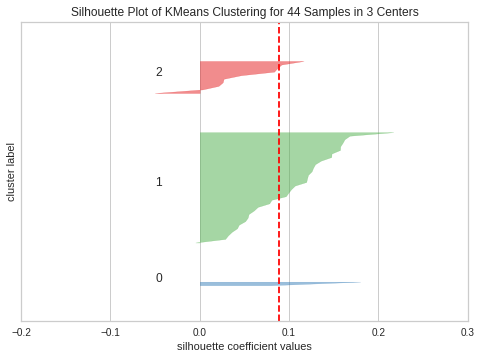

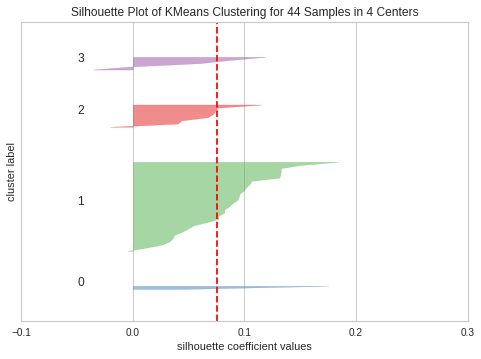

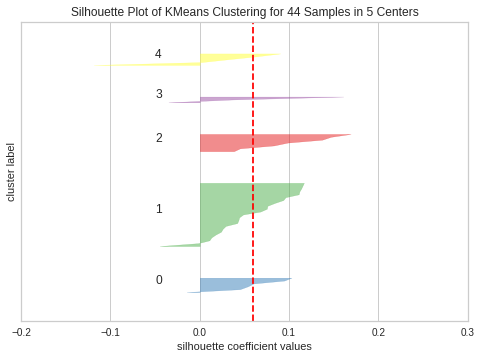

In [10]:
scores = silhouette_plot(df[cols], 3, 5)

In [11]:
model = KMeans(n_clusters=3)
model.fit(df[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
df["cluster"]=model.labels_
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1,2


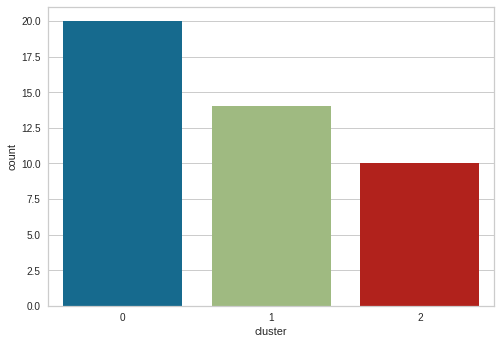

In [13]:
sns.countplot(x="cluster", data=df)

In [14]:
df.sort_values('cluster', inplace=True)

In [15]:
df_cluster_1 = df.copy().loc[df["cluster"] == 0]
df_cluster_2 = df.copy().loc[df["cluster"] == 1]
df_cluster_3 = df.copy().loc[df["cluster"] == 2]
#df_cluster_4 = df.copy().loc[df["cluster"] == 3]

In [16]:
df_cluster_2

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen,cluster
33,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1
38,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1
29,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1
40,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1
41,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1
26,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
11,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1,1


In [17]:
#Let's pick top 10 for each groups

In [18]:
df_cluster_1_top10 = df_cluster_1.copy().sum(axis=0).sort_values(ascending=False)[1:11]
df_cluster_1_top10

Bag            20
Shabu          20
Roti           20
Bolster        19
Cashew nuts    18
Curry puff     18
Fan            17
Software       17
Dumbell        17
BBQ            16
dtype: int64

In [19]:
df_cluster_2_top10 = df_cluster_2.copy().sum(axis=0).sort_values(ascending=False)[1:11]
df_cluster_2_top10

Cashew nuts          14
Roti                 14
Curry puff           14
Shabu                14
Bag                  14
Sunscreen            14
Pork stick           14
BBQ                  13
Wa grill             13
Ornamental plants    13
dtype: int64

In [20]:
df_cluster_3_top10 = df_cluster_3.copy().sum(axis=0).sort_values(ascending=False)[1:11]
df_cluster_3_top10

Sunscreen      10
Bag            10
Shabu          10
Dido            9
Curry puff      9
Roti            8
Pork stick      8
Board game      8
Cashew nuts     8
Software        7
dtype: int64

In [21]:
#df_cluster_4_top10 = df_cluster_4.copy().sum(axis=0).sort_values(ascending=False)[1:11]
#df_cluster_4_top10